In [1]:
import pandas as pd
news=pd.read_csv('OnlineNewsPopularity.csv')

C:\Users\Bhagavan\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [44]:
news.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,abovemedianshares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,0
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,1
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,0
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,0


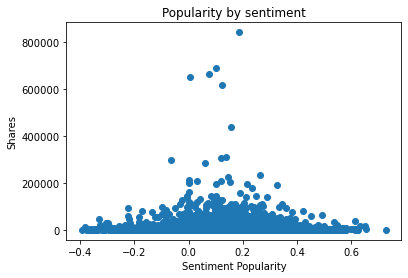

In [3]:
from matplotlib import pyplot as plt
plt.scatter(news[' global_sentiment_polarity'],news[' shares'])
plt.title('Popularity by sentiment')
plt.xlabel('Sentiment Popularity')
plt.ylabel('Shares')
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression
x=news[' global_sentiment_polarity'].values.reshape(-1,1)
y=news[' shares'].values.reshape(-1,1)
regressor=LinearRegression()
regressor.fit(x,y)
print(regressor.coef_)
print(regressor.intercept_)

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


[[499.34840588]]
[3335.80329021]


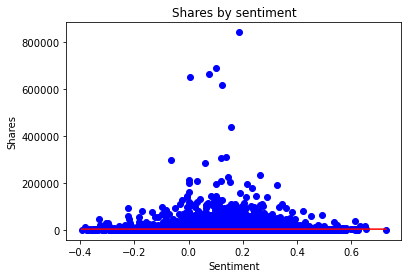

In [5]:
regline=regressor.predict(x)
plt.scatter(news[' global_sentiment_polarity'],news[' shares'],color='blue')
plt.plot(sorted(news[' global_sentiment_polarity'].tolist()),regline,'r')
plt.title('Shares by sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Shares')
plt.show()

In [10]:
#knn
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
allsentiment=news[' global_sentiment_polarity']
allshares=news[' shares'].tolist()
x=np.array(allsentiment).reshape(-1,1)
y=np.array(allshares)

In [16]:
knnregressor=KNeighborsRegressor(n_neighbors=15)
newsentiment=0.5
knnregressor.fit(x,y)
print(knnregressor.predict(np.array([newsentiment]).reshape(-1,1)))

[7344.46666667]


In [15]:
# coding for all supervised learning algorithms
#linear regression
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(np.array(allsentiment).reshape(-1,1),np.array(allshares))
print(regressor.predict(np.array([newsentiment]).reshape(1,-1)))
#knn
from sklearn.neighbors import KNeighborsRegressor
knnregressor=KNeighborsRegressor(n_neighbors=15)
knnregressor.fit(np.array(allsentiment).reshape(-1,1),np.array(allshares))
print(knnregressor.predict(np.array([newsentiment]).reshape(1,-1)))
#decision trees
from sklearn.tree import DecisionTreeRegressor
dtregressor=DecisionTreeRegressor(max_depth=3)
dtregressor.fit(np.array(allsentiment).reshape(-1,1),np.array(allshares))
print(dtregressor.predict(np.array([newsentiment]).reshape(1,-1)))
#random forest
from sklearn.ensemble import RandomForestRegressor
rfregressor=RandomForestRegressor()
rfregressor.fit(np.array(allsentiment).reshape(-1,1),np.array(allshares))
print(rfregressor.predict(np.array([newsentiment]).reshape(1,-1)))
#neural network
from sklearn.neural_network import MLPRegressor
nnregressor=MLPRegressor()
nnregressor.fit(np.array(allsentiment).reshape(-1,1),np.array(allshares))
print(nnregressor.predict(np.array([newsentiment]).reshape(1,-1)))

[3585.47749315]
[7344.46666667]
[3978.70776621]
[5065.5628153]
[3969.3324322]


C:\Users\Bhagavan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


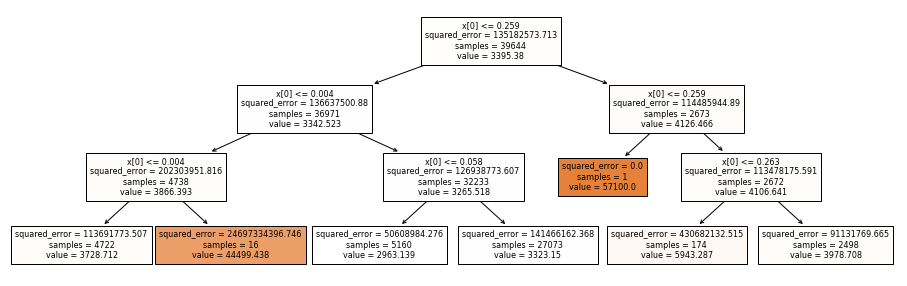

In [17]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(16,5))
plot_tree(dtregressor, filled=True, fontsize=8)
plt.savefig('decisiontree.png')

In [18]:
#measuring prediction accuracy 
allprediction=regressor.predict(np.array([allsentiment]).reshape(-1,1))
predictionerror=abs(allprediction-allsentiment)
print(np.mean(predictionerror))

3395.26087436506


In [19]:
# the preiction accuracy only tell something after it happened instead if we split data and train it 
# and have sub test data we can predict how much error it can generate in future
from sklearn.model_selection import train_test_split
x=np.array([allsentiment]).reshape(-1,1)
y=np.array(allshares)
trainingx,testx,trainingy,testy=train_test_split(x,y,random_state=1)

In [20]:
print(len(trainingx))
print(len(trainingy))
print(len(testx))
print(len(testy))

29733
29733
9911
9911


In [21]:
rfregressor=RandomForestRegressor(random_state=1)
rfregressor.fit(trainingx,trainingy)
predicted=rfregressor.predict(testx)
predictionerror=abs(predicted-testy)


In [22]:
print(np.mean(predictionerror))

3816.4741523079983


In [26]:
knnregressor=KNeighborsRegressor(n_neighbors=15)
knnregressor.fit(trainingx,trainingy)
predicted=knnregressor.predict(testx)
predictionerror=abs(predicted-testy)

In [27]:
print(np.mean(predictionerror))

3305.1753876164535


In [30]:
#working with multivariate model
x=news[[' global_sentiment_polarity',' n_unique_tokens',' n_non_stop_words']]
y=np.array(allshares)
trainingx,testx,trainingy,testy=train_test_split(x,y,random_state=1)
from sklearn.ensemble import RandomForestRegressor
rfregressor=RandomForestRegressor(random_state=1)
rfregressor.fit(trainingx,trainingy)
predicted=rfregressor.predict(testx)
predictionerror=abs(predicted-testy)

In [31]:
print(np.mean(predictionerror))

3474.431322312199


In [32]:
#using classificaion instead of regression
themedian=np.median(news[' shares'])
news['abovemedianshares']=1*(news[' shares']>themedian)


In [40]:
x=news[[' global_sentiment_polarity',' n_unique_tokens',' n_non_stop_words']]
y=np.array(news['abovemedianshares'])
trainingx,testx,trainingy,testy=train_test_split(x,y,random_state=1)
from sklearn.neighbors import KNeighborsClassifier
knnclassifier=KNeighborsClassifier(n_neighbors=15)
trainingx,testx,trainingy,testy=train_test_split(x,y,random_state=1)
knnclassifier.fit(trainingx,trainingy)
predicted=knnclassifier.predict(testx)

In [41]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(testy,predicted))

[[2833 2150]
 [2539 2389]]


In [42]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision=precision_score(testy,predicted)
recall=recall_score(testy,predicted)

In [43]:
print(precision)
print(recall)

0.5263273848865389
0.48478084415584416
